In [64]:
import numpy as np
import random
import gym
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import matplotlib.pyplot as plt

## 9-5 CartPole DQN Training

In [65]:
# 하이퍼 매개변수 설정
rho=0.9 # 학습률
lamda=0.99 # 할인율
eps=0.9
eps_decay=0.999
batch_siz=64
n_episode=100

In [66]:
# 신경망을 설계해주는 함수
def deep_network():
    mlp=Sequential()
    mlp.add(Dense(32,input_dim=env.observation_space.shape[0],activation='relu'))
    mlp.add(Dense(32,activation='relu'))
    mlp.add(Dense(env.action_space.n,activation='linear'))
    mlp.compile(loss='mse',optimizer='Adam')
    return mlp

In [67]:
# DQN 학습
def model_learning(model, D):
    mini_batch=np.asarray(random.sample(D,batch_siz))
    state=np.asarray([mini_batch[i,0] for i in range(batch_siz)])
    action=mini_batch[:,1]
    reward=mini_batch[:,2]
    state1=np.asarray([mini_batch[i,3] for i in range(batch_siz)])
    done=mini_batch[:,4]

    target=model.predict(state)
    target1=model.predict(state1)

    for i in range(batch_siz):
        if done[i]:
            target[i][action[i]]=reward[i]
        else:
            target[i][action[i]]+=rho*((reward[i]+lamda*np.max(target1[i]))-target[i][action[i]]) # Q 러닝(식 (9.19))
    model.fit(state,target,batch_size=batch_siz,epochs=1,verbose=0)

In [68]:
deep_network().summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                160       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [69]:
s[0]

-1.3607938

In [70]:
env=gym.make("CartPole-v0")

model=deep_network() # 신경망 생성
print(model.summary())
D=deque(maxlen=2000) # 리플레이 메모리 초기화
scores=[]
max_steps=env.spec.max_episode_steps

# 신경망 학습
for i in range(n_episode):
    s=env.reset()[0]
    long_reward=0

    while True:
        r=np.random.random()
        eps=max(0.01,eps*eps_decay) # epsilon을 조금씩 줄여나감
        if(r<eps):
            a=np.random.randint(0,env.action_space.n) # 랜덤 정책
        else:
            q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
            a=np.argmax(q[0])
        s1,r,done,truncated,_=env.step(a)
        if (done or truncated) and long_reward<max_steps-1: # 실패
            r=-100

        D.append((s,a,r,s1,done))

        if len(D)>batch_siz*3:
            model_learning(model, D)

        s=s1
        long_reward+=r
        
        if done:
            long_reward=long_reward if long_reward==max_steps else long_reward+100
            print(i,"번째 에피소드의 점수:",long_reward)
            scores.append(long_reward)
            break

    if i>10 and np.mean(scores[-5:])>(0.95*max_steps):
        break
    
# 신경망 저장
model.save("./cartpole_by_DQN.h5")
env.close()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                160       
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 17ms/step


/home/jt/anaconda3/envs/tf2.2/lib/python3.8/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


1/1 [==============================] - 0s 13ms/step
0 번째 에피소드의 점수: 29.0
1/1 [==============================] - 0s 11ms/step
1 번째 에피소드의 점수: 15.0
1/1 [==============================] - 0s 11ms/step
2 번째 에피소드의 점수: 18.0
1/1 [==============================] - 0s 11ms/step
3 번째 에피소드의 점수: 15.0
1/1 [==============================] - 0s 11ms/step
4 번째 에피소드의 점수: 22.0
1/1 [==============================] - 0s 11ms/step
5 번째 에피소드의 점수: 16.0
1/1 [==============================] - 0s 24ms/step
6 번째 에피소드의 점수: 43.0
1/1 [==============================] - 0s 12ms/step
7 번째 에피소드의 점수: 11.0
2/2 [==============================] - 0s 2ms/step


<ipython-input-67-2346f6f0c087>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mini_batch=np.asarray(random.sample(D,batch_siz))


2/2 [==============================] - 0s 2ms/step
8 번째 에피소드의 점수: 17.0
2/2 [==============================] - 0s 2ms/step
9 번째 에피소드의 점수: 17.0
2/2 [==============================] - 0s 2ms/step
10 번째 에피소드의 점수: 15.0
2/2 [==============================] - 0s 3ms/step
11 번째 에피소드의 점수: 30.0
2/2 [==============================] - 0s 2ms/step
12 번째 에피소드의 점수: 28.0
2/2 [==============================] - 0s 2ms/step
13 번째 에피소드의 점수: 13.0
2/2 [==============================] - 0s 2ms/step
14 번째 에피소드의 점수: 13.0
2/2 [==============================] - 0s 3ms/step
15 번째 에피소드의 점수: 28.0
2/2 [==============================] - 0s 2ms/step
16 번째 에피소드의 점수: 14.0
2/2 [==============================] - 0s 2ms/step
17 번째 에피소드의 점수: 9.0
2/2 [==============================] - 0s 2ms/step
18 번째 에피소드의 점수: 11.0
2/2 [==============================] - 0s 3ms/step
19 번째 에피소드의 점수: 21.0
2/2 [==============================] - 0s 2ms/step
20 번째 에피소드의 점수: 28.0
2/2 [==============================] - 0s 2ms/step
21 번째 에피소드의 점수: 

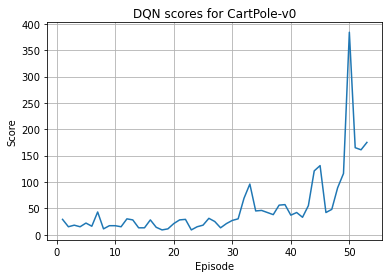

In [71]:
plt.plot(range(1,len(scores)+1),scores)
plt.title('DQN scores for CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

In [72]:
s1, q[0]

(array([ 2.4038053 ,  0.6751859 , -0.09714003,  0.13341933], dtype=float32),
 array([-30.323204, -33.726868], dtype=float32))

In [63]:
model.predict(np.reshape(s1, [1,4]))

1/1 [==============================] - 0s 20ms/step


array([[20.051697, 23.43208 ]], dtype=float32)

## 9-6 CartPole Play with trained model

In [73]:
from tensorflow.keras.models import load_model
import time

In [74]:
# 신경망 블러옴
model=load_model('./cartpole_by_DQN.h5')

env=gym.make("CartPole-v0", render_mode='rgb_array')
long_reward=0
output_image=[]

# CartPole 플레이
s=env.reset()[0]
while True:
    q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
    a=np.argmax(q[0])
    s1,r,done,truncated,_=env.step(a)
    s=s1
    long_reward+=r
    
    

    output_image.append(env.render())
    time.sleep(0.02)

    if done or truncated:
        print("에피소드의 점수:",long_reward)
        break

env.close()

1/1 [==============================] - 0s 16ms/step
에피소드의 점수: 144.0


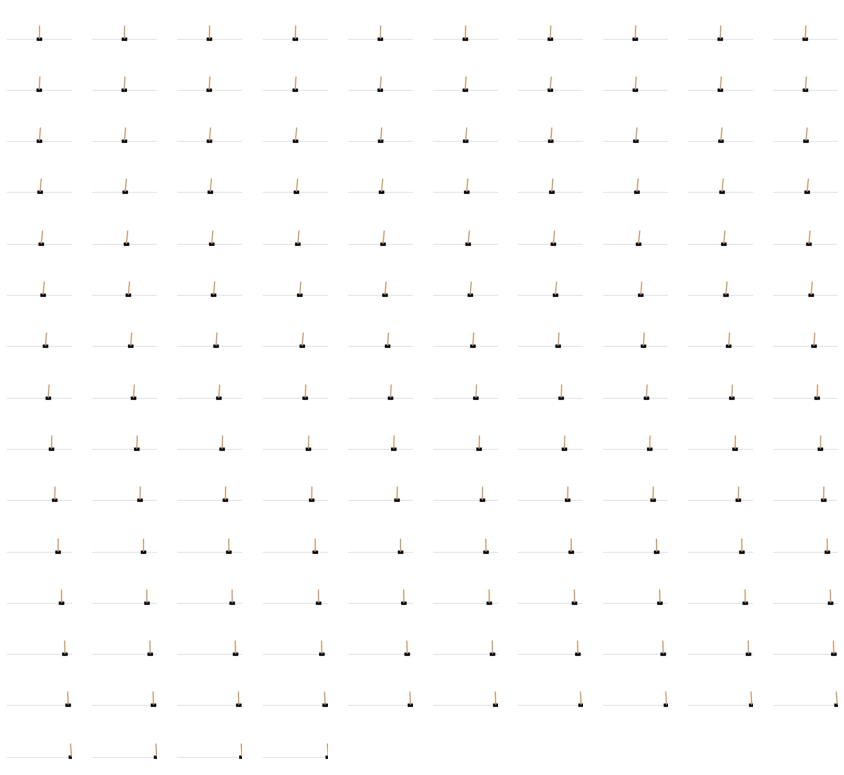

In [75]:
# Create a new figure
plt.figure(figsize=(15, long_reward//10))

# Display each image in a row
for i, img in enumerate(output_image):
    plt.subplot((len(output_image)-1)//10+1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')